#Polynomial Curve Fitting

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
def syntactic_data(num_data=10, interval=[0,1], func=np.sin, sigma=0.2, seed=1):
  """
  This function creates a syntactic data with Gaussian noise
  """
  x = np.linspace(interval[0], interval[1], num_data)
  x_100p = np.linspace(interval[0], interval[1], 100)
  random.seed(seed)
  noise = np.random.normal(0,sigma,num_data)
  y = func(2*np.pi*x) + noise
  y_true_100p = func(2*np.pi*x_100p)
  random.seed(seed)
  y_test_100p = func(2*np.pi*x_100p) + np.random.normal(0,sigma,100)
  return x, y, x_100p, y_true_100p, y_test_100p

class Polynomial_regression:
  """
  To calculate weights, prediction and E_RMS of polynomial regression
  """
  def __init__(self, x=None, y=None, degree=3, w_star=None):
    self.x = x
    self.y = y
    self.d = degree
    self.w_star = w_star

  # dedining feature matrix
  def feature_matrix(self):
    self.X = np.ones((len(self.x),self.d+1))
    for i in range(1, self.d + 1):
      self.X[:,i] = self.x**i

  # caclulating the weights
  def weights(self):
    Polynomial_regression.feature_matrix(self)
    if self.w_star is None:
      self.w_star = np.linalg.pinv(self.X) @ self.y.reshape(-1,1) 
    return self.w_star

  # prediction
  def prediction(self):
    Polynomial_regression.weights(self) 
    self.y_pred = self.X @ self.w_star.reshape(-1,1)
    self.y_pred =self.y_pred.reshape(-1)
    return self.y_pred
 
  # Root Mean Square Error
  def error(self):
    Polynomial_regression.prediction(self)
    self.E = 0.5 * np.linalg.norm(self.y - self.y_pred)**2
    self.E_RMS = np.sqrt(2*self.E/len(self.y)) 
    return self.E_RMS

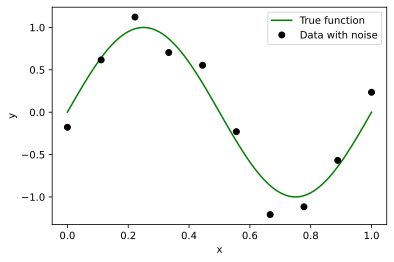

In [7]:
x, y, x_100p, y_true_100p, y_test_100p = syntactic_data()
plt.plot(x_100p, y_true_100p, color='green', label="True function")
plt.plot(x, y, 'o', color='black', label="Data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

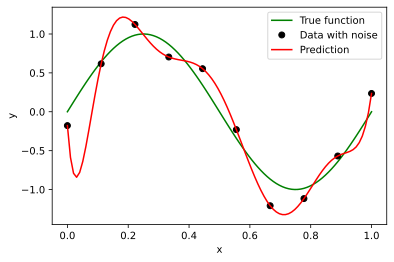

In [8]:
degree = 9
poly_10p = Polynomial_regression(x, y ,degree=degree)
w = poly_10p.weights()
y_pred_100p = Polynomial_regression(x_100p, degree=degree, w_star=w).prediction()

plt.plot(x_100p, y_true_100p, color='green', label="True function")
plt.plot(x, y, 'o', color='black', label="Data with noise")
plt.plot(x_100p, y_pred_100p, color='red', label="Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

##Root Mean Square error ($E_{RMS}$)
Root mean square error for a polynomial of degree $M \in \{0,1,...,9\}$ is plotted below.

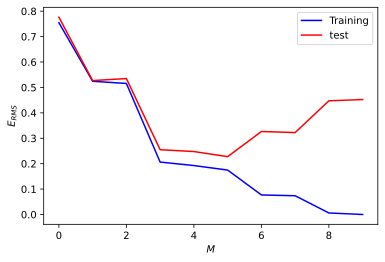

In [5]:
E_train = np.zeros(10)
E_test  = np.zeros(10)

for degree in range(10):
  train = Polynomial_regression(x, y, degree=degree)
  E_train[degree] = train.error()
  E_test[degree]  = Polynomial_regression(x_100p, y_test_100p, degree=degree, w_star=train.w_star).error()

plt.plot(range(10), E_train, color='blue', label="Training")
plt.plot(range(10), E_test , color='red',  label="test")
plt.xlabel("$M$")
plt.ylabel("$E_{RMS}$")
plt.legend();